In [8]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
#Use the URL for the raw CSV data
url = 'https://raw.githubusercontent.com/Dhanush-adk/machine_learning/main/project/data_preprocessed.csv'
df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,7,19,3,5,2015,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,17,20,4,7,2009,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,24,21,0,8,2009,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,26,8,4,6,2009,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,28,17,3,8,2014,4.475450


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [11]:
X = df.drop('fare_amount', axis = 1)
y = df[['fare_amount']]

In [12]:
X = pd.DataFrame(X, columns=X.columns, index=X.index).values
y = pd.DataFrame(y, columns=y.columns, index=y.index).values

In [13]:
train_X, val_X, train_Y, val_Y = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = torch.tensor(train_X)
y_train =  torch.tensor(train_Y)
X_val =  torch.tensor(val_X)
y_val =  torch.tensor(val_Y)

In [14]:
training_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(training_data, batch_size=32, shuffle=True)

val_data = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_data, batch_size=32)

In [15]:
def model_train(model, criterion, optimizer, epochs, train_loader, X_val, y_val):
    loss_train = []
    loss_val = []
    for epoch in range(epochs + 1):
        # Training
        model.train()
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets.view(-1,1))
            loss.backward()
            optimizer.step()
        # Validation
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            if epoch % 50 == 0:
              print(f'Epoch {epoch}/{epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}')
            loss_val.append(val_loss)
            loss_train.append(loss)
    return loss_train, loss_val

In [16]:
model1 = nn.Sequential(
    nn.Linear(X_train.shape[1], 32),
    nn.Tanh(),
    nn.Linear(32, 1)
).to(torch.float64)
optimizer1 = optim.SGD(model1.parameters(), lr=0.01)


In [17]:
import time

start_time = time.time()
train_loss, val_loss = model_train(model1, nn.MSELoss(), optimizer1, 1000, train_loader, X_val, y_val)
end_time = time.time()
training_time = end_time - start_time
print(f"Training Time: {training_time} seconds")

Epoch 0/1000, Training Loss: 44.49786115560845, Validation Loss: 101.80413328455042
Epoch 50/1000, Training Loss: 128.2968451804319, Validation Loss: 102.8948652728135
Epoch 100/1000, Training Loss: 34.44496437057938, Validation Loss: 102.42148496578616
Epoch 150/1000, Training Loss: 80.85914580823733, Validation Loss: 101.89190802118675
Epoch 200/1000, Training Loss: 39.212276451964634, Validation Loss: 102.00652024003323
Epoch 250/1000, Training Loss: 29.677079822164302, Validation Loss: 106.42114694906874
Epoch 300/1000, Training Loss: 44.695803867150346, Validation Loss: 103.01730888017035
Epoch 350/1000, Training Loss: 113.71068867931123, Validation Loss: 102.49652820166145
Epoch 400/1000, Training Loss: 132.7319819971035, Validation Loss: 101.81051134825967
Epoch 450/1000, Training Loss: 61.16505796990311, Validation Loss: 103.02209597619816
Epoch 500/1000, Training Loss: 47.7470335652219, Validation Loss: 104.15707782175218
Epoch 550/1000, Training Loss: 27.307473888962143, Vali

In [18]:
torch.save(model1, 'model1.pth')

In [19]:
import pickle

# Save list to a file
with open('train_loss1.pkl', 'wb') as file:
    pickle.dump(train_loss, file)
with open('val_loss1.pkl', 'wb') as file:
    pickle.dump(val_loss, file)


In [32]:
def downsample_losses(train_loss, val_loss, step=50):
    train_loss_batch = [train_loss[i].detach().item() for i in range(0, len(train_loss), step)]
    val_loss_batch = [val_loss[i].detach().item() for i in range(0, len(val_loss), step)]
    return train_loss_batch, val_loss_batch

In [33]:
epochs = range(0, 1001, 50)

In [20]:
model1 = nn.Sequential(
    nn.Linear(X_train.shape[1], 32),
    nn.Tanh(),
    nn.Linear(32, 64),  # Second hidden layer with 64 neurons
    nn.Tanh(),
    nn.Linear(64, 16),  # Third hidden layer with 16 neurons
    nn.Tanh(),
    nn.Linear(16, 1) # Output layer with 1 neuron
).to(torch.float64)
criterion = nn.MSELoss()
optimizer1 = optim.Adam(model1.parameters(), lr=0.01)


In [21]:

import time

start_time = time.time()
train_loss2, val_loss2 = model_train(model1, nn.MSELoss(), optimizer1, 1000, train_loader, X_val, y_val)
end_time = time.time()
training_time = end_time - start_time
print(f"Training Time: {training_time} seconds")


Epoch 0/1000, Training Loss: 39.655987916926485, Validation Loss: 103.44604065734089
Epoch 50/1000, Training Loss: 18.73911697887604, Validation Loss: 102.27308558891055
Epoch 100/1000, Training Loss: 58.207599358726945, Validation Loss: 103.34297845397789
Epoch 150/1000, Training Loss: 82.71323868009665, Validation Loss: 101.87606496118339
Epoch 200/1000, Training Loss: 217.40170027059355, Validation Loss: 101.83560207159216
Epoch 250/1000, Training Loss: 134.85516570234708, Validation Loss: 102.52385971653418
Epoch 300/1000, Training Loss: 61.53694468835796, Validation Loss: 101.98577615958268
Epoch 350/1000, Training Loss: 100.683858746429, Validation Loss: 102.55888195406719
Epoch 400/1000, Training Loss: 27.319904567633426, Validation Loss: 102.75839866247246
Epoch 450/1000, Training Loss: 23.148088610447022, Validation Loss: 101.95257513606043
Epoch 500/1000, Training Loss: 28.748735303877258, Validation Loss: 101.90230581844693
Epoch 550/1000, Training Loss: 83.68945002981144, V

In [22]:
torch.save(model1, 'model2.pth')

In [23]:
import pickle

# Save list to a file
with open('train_loss2.pkl', 'wb') as file:
    pickle.dump(train_loss2, file)
with open('val_loss2.pkl', 'wb') as file:
    pickle.dump(val_loss2, file)


In [34]:
train_loss_batch1, val_loss_batch1 = downsample_losses(train_loss, val_loss, step=50)
train_loss_batch2, val_loss_batch2 = downsample_losses(train_loss2, val_loss2, step=50)

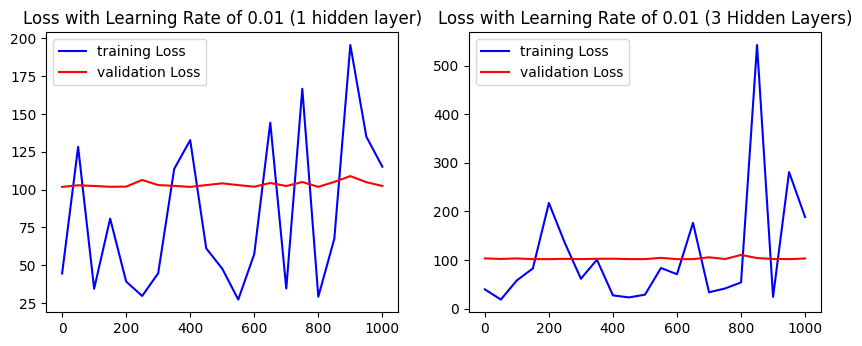

In [35]:
plt.figure(figsize=(10, 8))

plt.subplot(2,2,1)
plt.plot(epochs, train_loss_batch1, color='blue', label = 'training Loss')
plt.plot(epochs, val_loss_batch1, color='red', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.01 (1 hidden layer)')
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, train_loss_batch2, color='blue', label = 'training Loss')
plt.plot(epochs, val_loss_batch2, color='red', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.01 (3 Hidden Layers)')
plt.legend()

plt.show()


In [24]:
model1 = nn.Sequential(
    nn.Linear(X_train.shape[1], 32),
    nn.Tanh(),
    nn.Linear(32, 1)
).to(torch.float64)
optimizer1 = optim.SGD(model1.parameters(), lr=0.01)


In [25]:
import time

start_time = time.time()
train_loss5k, val_loss5k = model_train(model1, nn.MSELoss(), optimizer1, 5000, train_loader, X_val, y_val)
end_time = time.time()
training_time = end_time - start_time
print(f"Training Time: {training_time} seconds")

Epoch 0/5000, Training Loss: 53.01915799521281, Validation Loss: 101.81875308638561
Epoch 50/5000, Training Loss: 22.371055628323194, Validation Loss: 103.30760125569097
Epoch 100/5000, Training Loss: 160.83861159509775, Validation Loss: 104.76760391786256
Epoch 150/5000, Training Loss: 130.39274191473766, Validation Loss: 111.23808688776107
Epoch 200/5000, Training Loss: 186.93325046223873, Validation Loss: 105.70084446880394
Epoch 250/5000, Training Loss: 58.23179528048647, Validation Loss: 103.92616361708586
Epoch 300/5000, Training Loss: 47.01010981840783, Validation Loss: 102.8957000772039
Epoch 350/5000, Training Loss: 35.96521635773577, Validation Loss: 106.05405170635272
Epoch 400/5000, Training Loss: 93.62992000568583, Validation Loss: 101.85151436489647
Epoch 450/5000, Training Loss: 62.65183099509001, Validation Loss: 102.07784259460996
Epoch 500/5000, Training Loss: 100.13580333760568, Validation Loss: 103.24037894234715
Epoch 550/5000, Training Loss: 18.654443296625313, Va

In [26]:
torch.save(model1, 'model15k.pth')

In [27]:
import pickle

# Save list to a file
with open('train_loss15k.pkl', 'wb') as file:
    pickle.dump(train_loss5k, file)
with open('val_loss15k.pkl', 'wb') as file:
    pickle.dump(val_loss5k, file)
